# Modelo teórico.

Para dicho modelo vamos a tener lo siguiente:

$$N_{Az}=-D_{AB}\frac{dC_A}{dz}$$

$$-r_A=kC_A$$

Por un Balance de masa de A, tengo: 

$$VA = FE - FS + RP - RC$$

$$0 = N_{Az}Rd\theta dR - \left(N_{Az}Rd\theta dR + \frac{N_{Az}Rd\theta dR}{dz}dz\right) + 0 - (-r_A)Rd\theta dRdz$$

Simplificando:

$$0 = \frac{dN_{Az}}{dz} + (-r_A)$$

Sustituyendo valores:

$$0 = \frac{d^2C_A}{dz^2} - \frac{k}{D}C_A$$

Considero agrupar las constantes en un solo término:

$$m = \sqrt{\frac{k}{D}}$$

Obtengo:

$$0 = \frac{d^2C_A}{dz^2} - m^2C_A$$

Resulevo la EDO lineal de coeficientes constantes, por lo que me queda:

$$C_A = Cte_1\sinh(mz) + Cte_2\cosh(mz)$$

Considerando las condiciones contorno obtengo:

-Para: $$z = 0 \ y \ C_A=(C_A)_0$$

$$Cte_2 = (C_A)_0$$

-Para: $$z = L \ y \ C_A=a(C_A)_0$$

$$Cte_1 = \frac{a(C_A)_0}{\sinh(mL)} - \frac{(C_A)_0\cosh(mL)}{\sinh(mL)}$$

Sustituyendo en la ecuación para la concentración de A:

$$C_A = \left(\frac{a(C_A)_0}{\sinh(mL)} - \frac{(C_A)_0\cosh(mL)}{\sinh(mL)}\right)\sinh(mz) + (C_A)_0\cosh(mz)$$

Agrupando y simplificando la ecuación anterior, obtengo:

$$C_A = (C_A)_0\left(\frac{a\sinh(mz)}{\sinh(mL)} + \frac{\sinh(m(L - z)}{\sinh(mL)}\right)$$

Esta ecuación para la concetración de A, se empleará para el desarrollo del código, el cual está dado por:

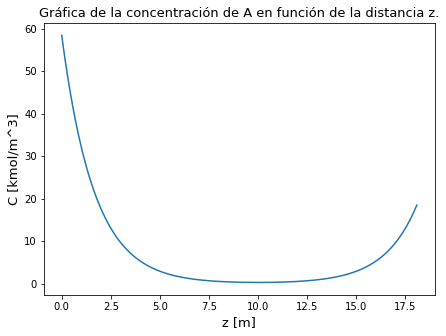

In [1]:
import numpy as np
import matplotlib.pyplot as plt

z1 = 0 #m
L = 18.10 #m
zf = 2.04 #m
k = 0.0031 #s^-1
D = 0.0086305 #m2/s
h = 0.02 #m
C0 = 58.42 #kmol/m3
a = 0.32
z = np.arange(z1, L, h)
m = np.sqrt(k/D)

def C(z):
  return C0*(a*(np.sinh(m*z)/np.sinh(m*L))+(np.sinh(m*(L-z))/np.sinh(m*L)))

Teo = C(zf)

plt.figure(figsize=(7,5))
plt.plot(z,C(z))
plt.title("Gráfica de la concentración de A en función de la distancia z.", fontsize=13)
plt.xlabel("z [m]", fontsize=13)
plt.ylabel("C [kmol/m^3]", fontsize=13)
plt.show()

In [2]:
def Derivada(f,h,t):
    c1=f(t-h)
    c2=f(t+h)
    dC=(c2-c1)/(2*h)
    return dC
q0 = Derivada(C,h,0)
print("El valor para la derivada de la ecuación encontrada por el modelo teórico en z = z1 es de: " + str(round(q0,2)) + "\nEste valor será empleado para la resolución por el método Runge-Kutta 4.")

El valor para la derivada de la ecuación encontrada por el modelo teórico en z = z1 es de: -35.01
Este valor será empleado para la resolución por el método Runge-Kutta 4.


In [3]:
f = lambda x: k*x/D

def R_K_4(f,zf):
    q = q0
    x = C0
    v = z1
    while v <= zf:
        l1 = h*q
        k1 = h*f(x)
        l2 = h*(q + k1/2)
        k2 = h*f(x + l1/2)
        l3 = h*(q + k2/2)
        k3 = h*f(x + l2/2)
        l4 = h*(q + k3)
        k4 = h*f(x + l3)
        q = q + (k1+2*k2+2*k3+k4)/6
        x = x + (l1+2*l2+2*l3+l4)/6
        v = v + h
    return x

RK4 = R_K_4(f,zf)

print("El valor para la concentración de A encontrada por el método de Runge-Kutta 4 en z = 2.04 es de: " + str(round(RK4,2)) + " kmol/m^3")

El valor para la concentración de A encontrada por el método de Runge-Kutta 4 en z = 2.04 es de: 17.2 kmol/m^3


In [4]:
error = (abs(RK4-Teo)/Teo)*100
error

print("El porcentaje de error de la respuesta obtenida por el método de Runge-Kutta 4 es de: " + str(round(error,4)) + " %")

El porcentaje de error de la respuesta obtenida por el método de Runge-Kutta 4 es de: 0.0126 %
